### Objective
Implement a neural network from scratch to solve the XOR problem
and understand why backpropagation is required for non-linear
decision boundaries.


In [ ]:
import math
import random

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
targets = [0, 1, 1, 0]

random.seed(1)

input_nodes = 2
hidden_nodes = 2
output_nodes = 1
learning_rate = 0.5

weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_nodes)] for _ in range(input_nodes)]
weights_hidden_output = [random.uniform(-1, 1) for _ in range(hidden_nodes)]
bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_nodes)]
bias_output = random.uniform(-1, 1)

for epoch in range(10000):
    total_error = 0
    for idx in range(len(inputs)):
        x = inputs[idx]
        y = targets[idx]

        hidden = []
        for j in range(hidden_nodes):
            z = sum(x[i] * weights_input_hidden[i][j] for i in range(input_nodes)) + bias_hidden[j]
            hidden.append(sigmoid(z))

        z_output = sum(hidden[j] * weights_hidden_output[j] for j in range(hidden_nodes)) + bias_output
        output = sigmoid(z_output)

        error = y - output
        total_error += error ** 2

        d_output = error * sigmoid_derivative(output)
        d_hidden = [d_output * weights_hidden_output[j] * sigmoid_derivative(hidden[j]) for j in range(hidden_nodes)]

        for j in range(hidden_nodes):
            weights_hidden_output[j] += learning_rate * d_output * hidden[j]
        bias_output += learning_rate * d_output

        for j in range(hidden_nodes):
            for i in range(input_nodes):
                weights_input_hidden[i][j] += learning_rate * d_hidden[j] * x[i]
            bias_hidden[j] += learning_rate * d_hidden[j]

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {total_error:.4f}")

print("\nFinal predictions:")
for x in inputs:
    hidden = [sigmoid(sum(x[i] * weights_input_hidden[i][j] for i in range(input_nodes)) + bias_hidden[j]) for j in range(hidden_nodes)]
    output = sigmoid(sum(hidden[j] * weights_hidden_output[j] for j in range(hidden_nodes)) + bias_output)
    print(f"Input: {x}, Output: {round(output, 3)}")


Epoch 0, Error: 1.1937
Epoch 1000, Error: 0.2256
Epoch 2000, Error: 0.0128
Epoch 3000, Error: 0.0060
Epoch 4000, Error: 0.0038
Epoch 5000, Error: 0.0028
Epoch 6000, Error: 0.0022
Epoch 7000, Error: 0.0018
Epoch 8000, Error: 0.0015
Epoch 9000, Error: 0.0013

Final predictions:
Input: [0, 0], Output: 0.019
Input: [0, 1], Output: 0.984
Input: [1, 0], Output: 0.984
Input: [1, 1], Output: 0.017


Cluster Centers:
 [[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Labels: [1 1 0 0 1 0]


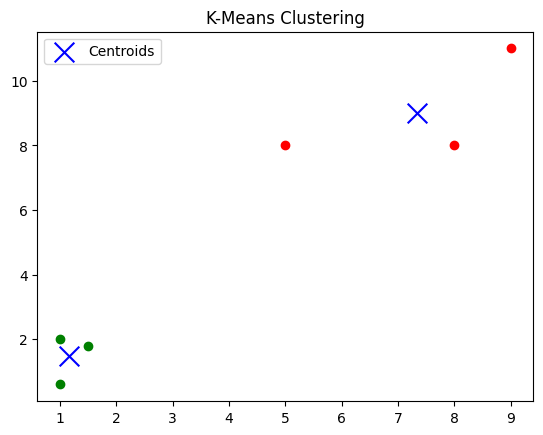

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_
print("Cluster Centers:\n", centers)
print("Labels:", labels)

colors = ["r", "g"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])

plt.scatter(centers[:, 0], centers[:, 1], color='b', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.5,
    max_iter=10000,
    random_state=1
)

model.fit(X, y)

predictions = model.predict(X)
print("Predictions:", predictions)
print("Probabilities:", model.predict_proba(X))


Predictions: [0 1 1 0]
Probabilities: [[0.9891798  0.0108202 ]
 [0.01219995 0.98780005]
 [0.01229825 0.98770175]
 [0.98137644 0.01862356]]


## Observations

- Single-layer perceptron cannot solve XOR.
- Multi-layer neural network solves XOR using backpropagation.
- Loss decreases as epochs increase.
